# Predicting prices of bulldozers using ML

In this notebook, we are going to predict the sale price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of sales?

## 2. Data

> The data is downloaded from the Kaggle Bluebook for Bulldozers Competition.

## 3. Evaluation

> The evaluation metric for this competition is the Root Mean Square Log Error between actual and predicted values.

## 4. Features

> Kaggle provides a data dictionary which we will be using.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [21]:
# Importing the training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [22]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

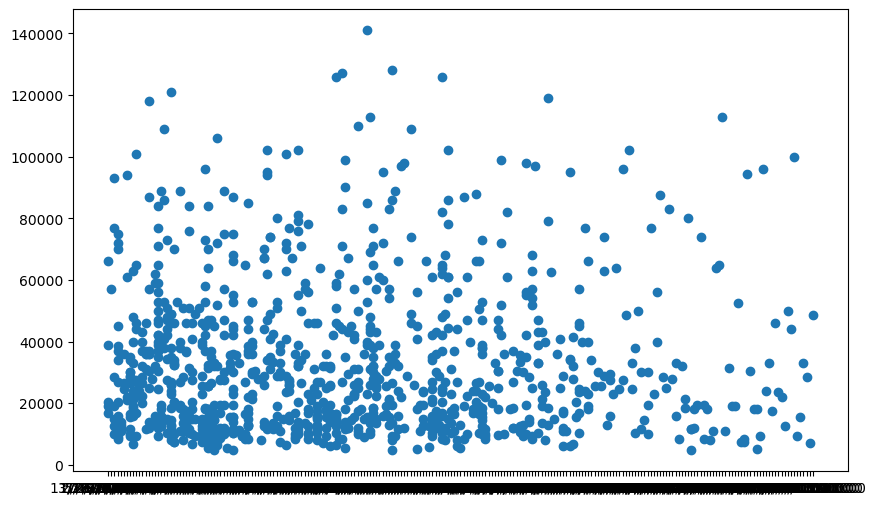

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

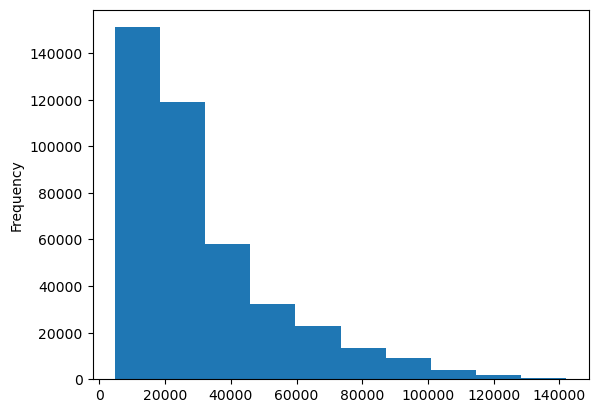

In [24]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we want to enrich the time and date component.

We can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter.

In [25]:
#Import data but with dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])
df.saledate.dtype

dtype('<M8[ns]')

In [26]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

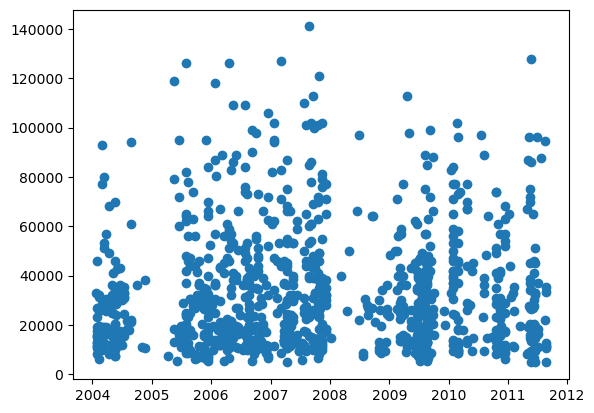

In [27]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [28]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [30]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by saledate

When working with time series, its a good idea to sort it

In [31]:
#Sorting using pandas

df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head(20)


205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [33]:
df_temp = df.copy()
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for `saledate` column

In [35]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["monthYear"] = df_temp.saledate.dt.month
df_temp["dayYear"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [36]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [38]:
df_temp.drop("saledate", axis = 1, inplace = True)

In [39]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [48]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [51]:
df_temp["UsageBand"].dtype

dtype('O')

In [52]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Convert strings to categories

In [54]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [55]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [62]:
#This will turn all string values into categories

for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [65]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [66]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [71]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### We still have missing values

In [75]:
( df_temp.isnull().sum()/len(df_temp) ) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [77]:
df_temp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
               index= False)

In [80]:
df_temp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                   low_memory = False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling missing values

In [81]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
monthYear
dayYear
saleDayOfWeek
saleDayOfYear


In [82]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [83]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label + "_is_missing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [87]:
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [88]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Non numeric are still unfilled

In [102]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Turn categorical into numbers and fill missing

In [91]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [105]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label +"_is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1
        print(label)
        
#We did +1 as -1 is default value for missing values

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [106]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [110]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [113]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

CPU times: total: 25min 42s
Wall time: 2min 38s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [112]:
model.score(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

0.9875468079970562

In [122]:
##Splitting data
trainset = df_temp[df_temp.saleYear != 2012]
valset = df_temp[df_temp.saleYear == 2012]

In [123]:
x_train, y_train = trainset.drop("SalePrice", axis = 1), trainset["SalePrice"]
x_valid, y_valid = valset.drop("SalePrice", axis = 1), valset["SalePrice"]


In [124]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)
model.fit(x_train, y_train)

CPU times: total: 23min 44s
Wall time: 2min 15s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [125]:
model.score(x_valid, y_valid)

0.8727175969771312

### Building an evaluation function

In [128]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test, y_preds):
    
    return np.sqrt((mean_squared_log_error(y_test, y_preds)))
                   
def show_scores(model):
                   
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds)}
    return scores
                   
thing = show_scores(model)
thing
    

{'Training RMSLE': 0.08426351714047395, 'Valid RMSLE': 0.25557446689440955}

In [129]:
# Testing our model on a subset (to tune the hyperparameters)
# Change max samples value to train on a smaller subset

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42,
                              max_samples=10000)

In [131]:
%%time
model.fit(x_train, y_train)


show_scores(model)


#Time is much less as we are modelling on a subset

CPU times: total: 55.6 s
Wall time: 5.96 s


{'Training RMSLE': 0.257745378256977, 'Valid RMSLE': 0.29362638671089003}

In [136]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              verbose = 2,
                              cv = 5,
                              n_iter= 100)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=20; total time=   1.8s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=20; total time=   1.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=20; total time=   1.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=20; total time=   1.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=20; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=20; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=20; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time= 1.2min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time= 1.2min
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   3.0s
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   3.5s
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   3.0s
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   3.4s
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   2.9s
[CV] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=16, n_estimators=50; total time=   0.8s
[CV] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=16, n_estimators=50; total time=   1.1s
[CV] END max_depth=3, max_features=1, min_samples_leaf=3,

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=40; total time=  28.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=40; total time=  28.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=40; total time=  28.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=40; total time=  28.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=40; total time=  29.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=  28.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=  28.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=  30.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=  28.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=  28.3s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=2, n_estimators=80; total time=  40.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=2, n_estimators=80; total time=  40.4s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=2, n_estimators=80; total time=  40.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=2, n_estimators=80; total time=  40.5s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=2, n_estimators=80; total time=  39.9s
[CV] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=16, n_estimators=20; total time=   1.9s
[CV] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=16, n_estimators=20; total time=   1.9s
[CV] END max_depth=None, max_featu

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time= 1.1min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time= 1.1min
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   3.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   3.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   3.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   3.8s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   3.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=11, min_samples_split=16, n_estimators=10; total time=  10.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=11, min_samples_split=16, n_estimators=10; total time=  10.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=11, min_samples_split=16, n_estimators=10; total time=  10.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=11, min_samples_split=16, n_estimators=10; total time=   9.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=11, min_samples_split=16, n_estimators=10; total time=   9.8s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   4.4s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   4.4s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   4.2s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   4.3s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   4.3s
[CV] END max_depth=5, max_features=1, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.7s
[CV] END max_depth=5, max_features=1, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.7s
[CV] END max_depth=5, max_features=1, min_samples_

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=  22.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=  22.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=  21.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=  21.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=  21.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   3.7s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=  16.0s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=  15.8s
[CV] END max_depth=10, max_features=0.5, min_

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=  22.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=  20.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=  20.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=  20.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=  19.6s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   2.0s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   2.0s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   2.0s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   1.8s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   1.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=40; total time=  18.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=40; total time=  17.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=40; total time=  17.8s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=40; total time=  17.5s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=40; total time=  17.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=40; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=40; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=40; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=40; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=40; total time=   4.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=18, n_estimators=80; total time=  12.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=18, n_estimators=80; total time=  12.0s
[CV] END max_depth=None, max_featur

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=  16.6s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=  16.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=  16.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=  15.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=  16.0s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=  22.3s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=  21.4s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=  21.0s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=  21.2s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=  21.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=10; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=10; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samp

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80; total time=  24.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80; total time=  24.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80; total time=  24.6s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80; total time=  24.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80; total time=  25.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=  10.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=  10.2s
[CV] END max_depth=5, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   1.1s
[CV] END max_depth=5, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   1.1s
[CV] END max_depth=5, max_features=1, min_samples_lea

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  42.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  42.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  41.6s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  38.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  37.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  48.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  44.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  44.5s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  40.7s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=  40.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=50; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=19, min_samples_split=12, n_estimators=50; total time=   7.0s
[CV] END max_depth=None,

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=80; total time= 1.2min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=80; total time= 1.4min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=80; total time= 1.3min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=80; total time= 1.2min


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=80; total time= 1.2min
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.9s
[CV] END max_depth=10, max_features=1, min_samples_leaf=17, min_samples_split=14, n_estimators=60; total time=   2.3s
[CV] END max_depth=10, max_features=1, min_samples_leaf=17, min_samples_split=14, n_estimators=60; total time=   2.4s
[CV] END max_depth=10, max_features=1, min_samp

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=  14.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=  14.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=  14.5s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=  14.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=  14.5s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.8s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.8s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.8s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.8s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.8s
[CV] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=12, n_estimators=80; total time=   3.6s
[CV] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=12, n_estimators=80; total time=   3.3s
[CV] END max_depth=10, max_features=1, min_samples_leaf=3, min

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=18, n_estimators=80; total time=  56.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=18, n_estimators=80; total time=  57.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=18, n_estimators=80; total time=  55.6s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=18, n_estimators=80; total time=  54.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=18, n_estimators=80; total time=  55.7s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=14, n_estimators=30; total time=  13.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=14, n_estimators=30; total time=  13.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=14, n_estimators=30; total time=  13.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=14, n_estimators=30; total time=  12.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=14, n_estimators=30; total time=  13.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=17, min_samples_split=14, n_estimators=80; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=17, min_samples_split=14, n_estimators=80; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=17, min_samples_split=14, n_estimators=80; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=17, min_samples_split=14, n_estimators=80; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=17, min_samples_split=14, n_estimators=80; total time=   5.1s
[CV] END max_depth=5, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.7s
[CV] END max_depth=5, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.7s
[CV] END max_depth=5, max_features=1, min_sample

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=11, min_samples_split=4, n_estimators=20; total time=   6.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=11, min_samples_split=4, n_estimators=20; total time=   5.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=11, min_samples_split=4, n_estimators=20; total time=   5.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=11, min_samples_split=4, n_estimators=20; total time=   6.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=11, min_samples_split=4, n_estimators=20; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   3.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END max_depth=3, max_features=sqrt, min_s

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=  48.0s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=  48.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=  54.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=  49.1s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=  47.9s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   3.4s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   3.3s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   3.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   3.2s


C:\Users\Public\MLP2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   3.2s
CPU times: total: 11min 20s
Wall time: 1h 29min 31s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=2)

In [137]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [138]:
show_scores(rs_model)

{'Training RMSLE': 0.18208283852701967, 'Valid RMSLE': 0.24717866912406908}

In [162]:
testset = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

In [156]:
testset.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [163]:
def preprocess_data(df):
    
    #Processing dates
    
    df["saleYear"] = df.saledate.dt.year
    df["monthYear"] = df.saledate.dt.month
    df["dayYear"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis = 1, inplace= True)
    
    #Fill numeric rows with median
    
    for label, content in df.items():
        
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
        #Filled categorical varibales and replace with numbers
    
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df

preprocess_data(testset)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [161]:
# we can find how cols differ using sets
set(x_train.columns) - set(testset.columns)

{'auctioneerID_is_missing'}

In [164]:
testset["auctioneerID_is_missing"] = False

In [165]:
rs_model.predict(testset)

C:\Users\Public\MLP2\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([18851.56408262, 18260.65241099, 57328.0113584 , ...,
       12405.57320482, 18286.91775727, 28938.94147296])

In [168]:
x_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


### Feature Importance

In [170]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [171]:
model = RandomForestRegressor(n_estimators= 30,
                              min_samples_split= 18,
                              min_samples_leaf= 9,
                              max_features= 0.5,
                              max_depth= None)
model.fit(x_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=9,
                      min_samples_split=18, n_estimators=30)

In [172]:
model.feature_importances_

array([3.43706447e-02, 1.68136789e-02, 3.88791450e-02, 1.63406990e-03,
       1.98691353e-03, 2.08933695e-01, 2.27535161e-03, 6.89030782e-04,
       3.73845938e-02, 5.40560639e-02, 6.97987620e-02, 4.19496984e-03,
       2.04786646e-02, 1.56891971e-01, 4.56426136e-02, 3.84825552e-03,
       2.51233316e-03, 3.63634863e-03, 2.78608322e-03, 6.03742052e-02,
       3.30135791e-04, 5.05327716e-04, 6.68629921e-04, 1.57752548e-04,
       1.27927864e-03, 6.25248922e-05, 1.94077321e-05, 6.55530986e-03,
       2.60492721e-04, 3.39533365e-03, 3.97569954e-03, 2.21160031e-03,
       4.24728579e-03, 2.60768669e-04, 2.24400740e-04, 1.16070856e-02,
       5.04191368e-04, 1.45916402e-02, 2.12883263e-03, 2.48200250e-03,
       1.63972181e-03, 5.22286699e-04, 2.02693650e-03, 3.78528971e-04,
       3.87185887e-04, 1.69689123e-04, 2.93763168e-04, 1.99570132e-03,
       7.66786076e-04, 3.79783494e-04, 2.30935894e-04, 7.32626820e-02,
       2.95755818e-03, 3.38094025e-03, 1.63937465e-03, 7.35921437e-03,
      

In [183]:
import seaborn as sns

def plot_features(columns, importances, n = 20):
    
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop = True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

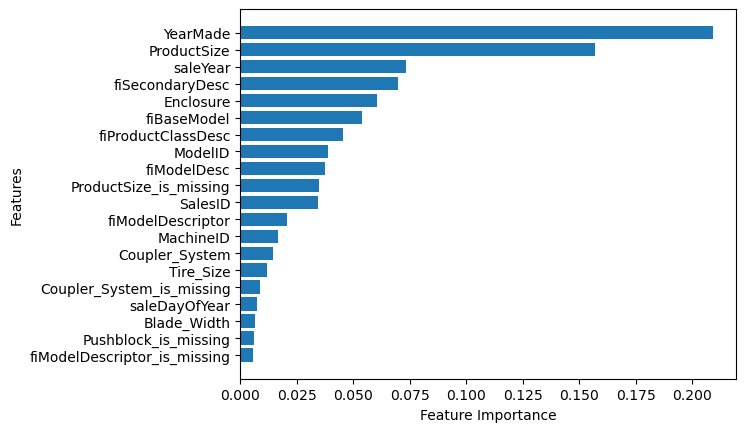

In [184]:
plot_features(x_train.columns, model.feature_importances_)